<a href="https://colab.research.google.com/github/aulialigar/computer-vision/blob/main/neural_network2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive/')

os.chdir('/content/drive/My Drive/TKC')
!ls -a

Mounted at /content/drive/
1  2  3


In [2]:
base_dir = '/content/drive/My Drive/TKC'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)

In [4]:
# persiapan data training
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),  
        shuffle = True,
        subset='training',
        class_mode='categorical')

# persiapan data validasi
validation_generator = validation_datagen.flow_from_directory(
        base_dir, 
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),  
        subset='validation',
        class_mode='categorical')

Found 2768 images belonging to 3 classes.
Found 305 images belonging to 3 classes.


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.1)

In [6]:
# persiapan data training
train_generator = train_datagen.flow_from_directory(
        base_dir,  
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),  
        shuffle = True,
        subset='training',
        class_mode='categorical')

# persiapan data validasi
validation_generator = validation_datagen.flow_from_directory(
        base_dir, 
        # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        target_size=(150, 150),  
        subset='validation',
        class_mode='categorical')

Found 2768 images belonging to 3 classes.
Found 305 images belonging to 3 classes.


<h3>Modeling</h3>

In [7]:
import tensorflow as tf

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='sigmoid')
])

In [9]:
# Tampilkan model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

In [10]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [11]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/100
25/25 - 225s - loss: 1.0318 - acc: 0.4588 - val_loss: 0.7936 - val_acc: 0.5312 - 225s/epoch - 9s/step
Epoch 2/100
25/25 - 149s - loss: 0.7728 - acc: 0.6500 - val_loss: 0.6428 - val_acc: 0.7688 - 149s/epoch - 6s/step
Epoch 3/100
25/25 - 96s - loss: 0.7066 - acc: 0.6760 - val_loss: 0.5299 - val_acc: 0.8250 - 96s/epoch - 4s/step
Epoch 4/100
25/25 - 71s - loss: 0.6267 - acc: 0.7175 - val_loss: 0.6084 - val_acc: 0.6687 - 71s/epoch - 3s/step
Epoch 5/100
25/25 - 55s - loss: 0.6222 - acc: 0.7207 - val_loss: 0.5790 - val_acc: 0.6875 - 55s/epoch - 2s/step
Epoch 6/100
25/25 - 45s - loss: 0.5213 - acc: 0.7613 - val_loss: 0.5901 - val_acc: 0.6875 - 45s/epoch - 2s/step
Epoch 7/100
25/25 - 34s - loss: 0.5175 - acc: 0.7713 - val_loss: 0.5234 - val_acc: 0.8000 - 34s/epoch - 1s/step
Epoch 8/100
25/25 - 31s - loss: 0.4613 - acc: 0.7850 - val_loss: 0.5362 - val_acc: 0.7375 - 31s/epoch - 1s/step
Epoch 9/100
25/25 - 30s - loss: 0.4508 - acc: 0.8213 - val_loss: 0.6447 - val_acc: 0.7000 - 30s/epoc

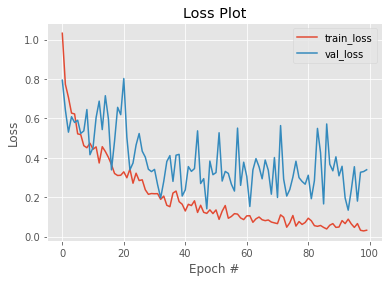

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

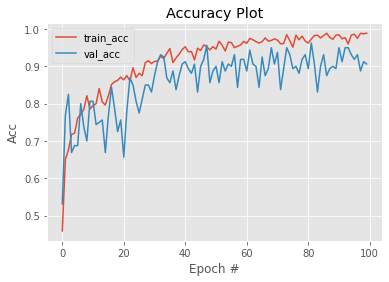

In [13]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
def evaluate(model):

  validation_generator = validation_datagen.flow_from_directory(
          base_dir, 
          target_size=(150,150), 
          batch_size=32, 
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_test_samples = len(validation_generator.filenames)

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['1', '2', '3']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [16]:
evaluate(model)

Found 305 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  



Confusion Matrix

[[ 66   0   4]
 [ 13 128   1]
 [  6   0  87]]


Classification Report

              precision    recall  f1-score   support

           1       0.78      0.94      0.85        70
           2       1.00      0.90      0.95       142
           3       0.95      0.94      0.94        93

    accuracy                           0.92       305
   macro avg       0.91      0.93      0.91       305
weighted avg       0.93      0.92      0.92       305

